In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# ex url: gs://my-bigdataproject-jg/landing/weather_data_Manhattan_2021.csv
bucket_name = 'my-bigdataproject-jg'
gs_path  = f'gs://{bucket_name}/landing/'

boroughs = ['Manhattan', 'Brooklyn']
years = [2021, 2022, 2023]

In [27]:
def get_weather_data(borough, year):
    file_name = f'weather_data_{borough}_{year}.csv'
    full_path = gs_path + file_name
    return pd.read_csv(full_path)

In [28]:
def analyze_data(df):
    print(f"Number of records: {len(df)}")
    print(f"Number of columns: {len(df.columns)}\n")
    print(df.info())

    print("\nMissing values:")
    print(df.isnull().sum())

    print(df.describe())

    # Create a histogram of tempreatures throughout the year
    df['datedatetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)
    df['temp'].plot()
    plt.show()

    # we want to check for outliers in temp, tempmax, tempmin, feelslike, feelslikemax, feelslikemin
    columns = ['temp', 'tempmax', 'tempmin', 'feelslike', 'feelslikemax', 'feelslikemin']
    # all in one chart
    df[columns].plot(kind='box')
    plt.show()

Processing data for Manhattan, 2021
Reading file: gs://my-bigdataproject-jg/landing/weather_data_Manhattan_2021.csv
Number of records: 365
Number of columns: 33

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              365 non-null    object 
 1   datetime          365 non-null    object 
 2   tempmax           365 non-null    float64
 3   tempmin           365 non-null    float64
 4   temp              365 non-null    float64
 5   feelslikemax      365 non-null    float64
 6   feelslikemin      365 non-null    float64
 7   feelslike         365 non-null    float64
 8   dew               365 non-null    float64
 9   humidity          365 non-null    float64
 10  precip            365 non-null    float64
 11  precipprob        365 non-null    int64  
 12  precipcover       365 non-null    float64
 13  preciptype        156 n

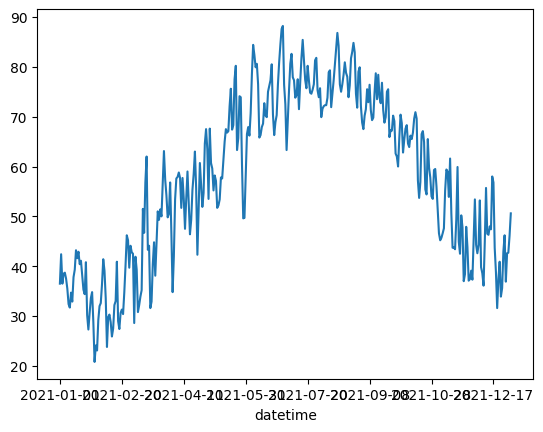

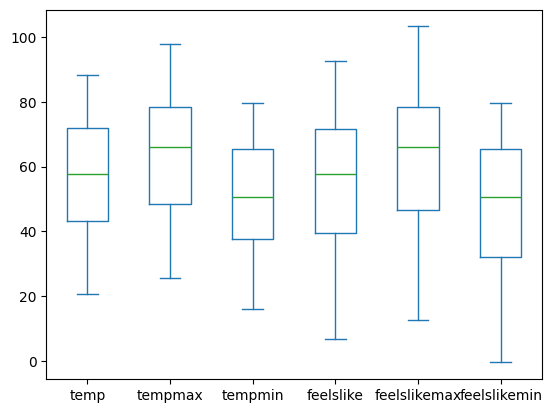

In [29]:
if __name__ == "__main__":
    for borough in boroughs:
        for year in years:
            print(f'Processing data for {borough}, {year}')
            df = get_weather_data(borough, year)
            analyze_data(df)
